#  <font color='red'> Bayesian Classification </font> 

We obtain the probability distribution of the line parameters rather than scalar estimates of slope and y intercept.
 

In [15]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


import numpy as np
import scipy as sc
from scipy.stats import multivariate_normal
from scipy.stats import norm 
from scipy.stats import uniform

import pandas as pd

plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [12, 6]


## Reading the data

In [16]:
fname = 'fishes.csv'
data = pd.read_csv(fname)
data.head(10)

,Fishtype,lightness,length
0,1.0,2.220252,-1.603168
1,1.0,3.771725,-3.621082
2,1.0,2.898739,-3.625635
3,1.0,4.484533,-1.227532
4,1.0,1.005928,-3.027846
5,0.0,-0.611962,0.252595
6,0.0,-1.617321,-0.085127
7,0.0,-1.086477,0.932646
8,1.0,2.255999,-2.207233
9,1.0,4.633921,-3.386524


## Extracting the different features

In [17]:
# Exctracting the fields with Fishtype=1 (bass)
bass = data[data["Fishtype"] == 1]
basslightness = bass['lightness'].to_numpy()
basslength = bass['length'].to_numpy()
basscount = bass['lightness'].count()

# Exctracting the fields with Fishtype=0 (salmon)
salmon = data[data["Fishtype"] == 0]
salmonlightness = salmon['lightness'].to_numpy()
salmonlength = salmon['length'].to_numpy()
salmoncount = salmon['lightness'].count()
bassfeatures = np.column_stack([basslightness,basslength])
salmonfeatures = np.column_stack([salmonlightness,salmonlength])

print(basscount)
print(salmoncount)

pbass = basscount/(basscount+salmoncount)
psalmon = salmoncount/(basscount+salmoncount)

32304
18203


## Plotting the histogram and kernel densities of lightness

To do 1: Use kernel density estimation using uniform window by completing the code in the assigned space


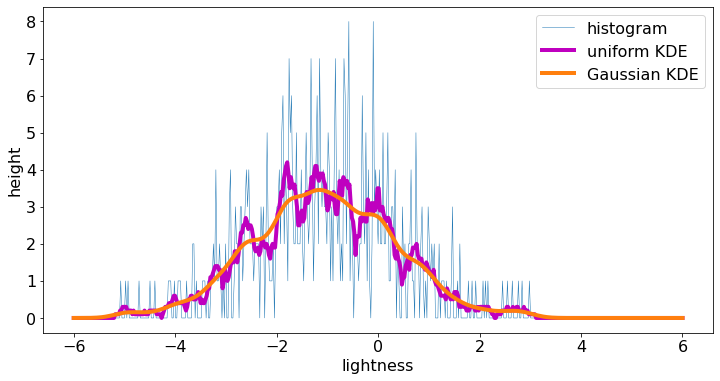

In [18]:

# Grid on which the histograms are computed
Ngrid = 500
x = np.linspace(-6, 6, Ngrid)
Delta = (x[1]-x[0])
scale = 10

# Picking only a few fishes to obtain fast computation
Nsalmon = 500
plt.xlabel('lightness')
plt.ylabel('height')
salmonlightness1= np.array(salmonlightness[1:Nsalmon])

# classical histogram
histogram,binedges = np.histogram(salmonlightness1,bins=x)
bincenters = (binedges[0:Ngrid-1]+binedges[1:Ngrid])/2

# Kernel density estimate using normal window
GaussianKDE = sum(norm(loc=xi,scale=Delta*scale).pdf(x) for xi in salmonlightness1)
GaussianKDE = GaussianKDE*Delta

# Your CODE HERE
#  Kernel density estimate using Uniform window
# Use scipy.stats.uniform, which specifies a uniform pdf centered at loc and width=scale
# You need to use a uniform window centered at 0 and width = -scale*Delta/2
# Normalize by dividing by Delta
#----------------------------
from scipy.stats import uniform
UniformKDE = sum(uniform(loc = xi - Delta*scale/2, scale=Delta*scale).pdf(x) for xi in salmonlightness1) 
UniformKDE *= Delta

#----------------------------

s = plt.plot(bincenters,histogram,label='histogram',linewidth=0.5)
s = plt.plot(x,UniformKDE,'m',linewidth=4,label='uniform KDE')
s = plt.plot(x,GaussianKDE,linewidth=4,label='Gaussian KDE')
s = plt.legend()

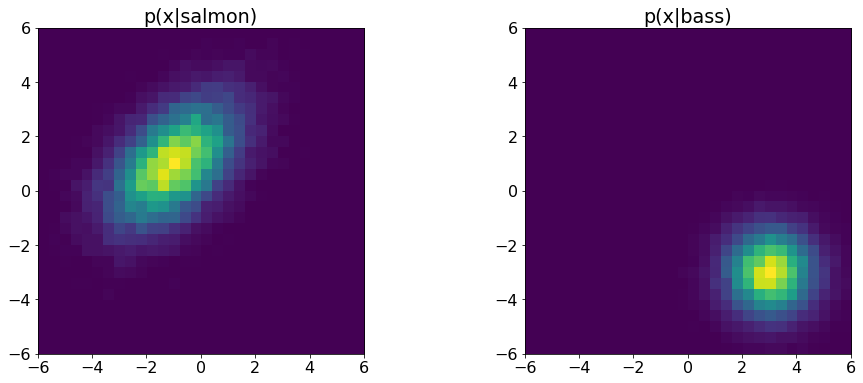

In [19]:
Nbins = 30
lbins = np.linspace(-6,6,Nbins+1)
hbins = np.linspace(-6,6,Nbins+1)

p_x_given_salmon, lbins, hbins = np.histogram2d(salmonfeatures[:,0],salmonfeatures[:,1], bins=(lbins, hbins))
p_x_given_salmon = p_x_given_salmon.T
p_x_given_salmon = p_x_given_salmon/salmoncount

p_x_given_bass, lbins, hbins = np.histogram2d(bassfeatures[:,0],bassfeatures[:,1], bins=(lbins, hbins))
p_x_given_bass = p_x_given_bass.T
p_x_given_bass = p_x_given_bass/basscount

# Plots
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(121, title='p(x|salmon)')
s=plt.imshow(p_x_given_salmon, interpolation='nearest', origin='low',extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
ax = fig.add_subplot(122, title='p(x|bass)')
s=plt.imshow(p_x_given_bass, interpolation='nearest', origin='low',extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])

## <font color=red>  To do: complete the function below for nearest neighbor computation </font>

Inputs

    testDataPt of size 2 x 1
    
    trainingData of size Nsamples x 3: last column is the class type

    nNeighbors

Output

    true if testDataPt is in Class 2, false if Class 1

Compute the distances from testDataPt to each of the trainingData points using np.linalg.norm. Sort the distances list using np.argsort. Pick the class types using  the indices and find the nNeighbors entries. Check if sum of  the class indices is greater than nNeighbors/2
    

In [20]:
def isClass2(testDataPt,trainingData,nNeighbors):
   errors = np.linalg.norm(trainingData[:,0:2]  - testDataPt, axis = 1)
   indices = np.argsort(errors)
   return  sum(trainingData[indices[0:nNeighbors],2]) > np.floor(nNeighbors/2)

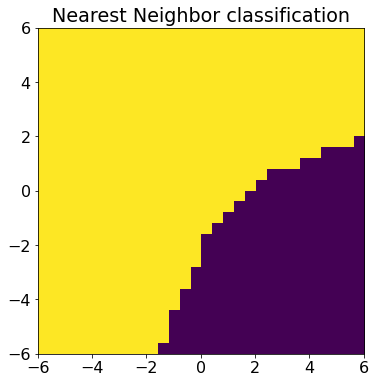

In [21]:
nTrainingsamples = 1000

bassfeatures1 = np.array(bassfeatures[0:nTrainingsamples,:])
bassfeatures1 = np.column_stack([bassfeatures1,np.zeros([nTrainingsamples,1])])
salmonfeatures1 = salmonfeatures[0:nTrainingsamples,:]
salmonfeatures1 = np.column_stack([salmonfeatures1,np.ones([nTrainingsamples,1])])
trainingData = np.row_stack([bassfeatures1,salmonfeatures1])

out = np.empty([Nbins,Nbins])
for i in range(Nbins):
    for j in range(Nbins):
        input = [hbins[i],lbins[j]]
        out[i,j] = isClass2(input,trainingData,5)

out =  out.T
s=plt.imshow(out, interpolation='nearest', origin='low',extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.title('Nearest Neighbor classification')